<a href="https://colab.research.google.com/github/Prakash0707/ML_Cross-Validation-and-Bootstrap/blob/master/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tree based Method

The given data is related with direct marketing campaigns of a Portuguese 
banking institution. The campaign is based on phone calls. My goal in this 
exercise is to test a few classification models in addition to determining 
whether or not a customer will subscribe.

Logistic Regression and Random Forest are performed in this exercise.

Installing Packages

In [ ]:
install.packages("DataExplorer")
install.packages("fastDummies")
install.packages("tidyverse")
install.packages("rsample")
install.packages("tidymodels")
install.packages("randomForest")
install.packages("vip")
install.packages("caret")
install.packages("car")

library(DataExplorer) 
library(fastDummies)  
library(tidyverse)
library(rsample)
library(tidymodels)
library(randomForest)
library(vip)
library(caret)
library(car)

Followed Method

➢ There are no missing values in the dataset

➢ Creating Dummies

➢ Model Building

➢ Predicting the output

➢ Creating confusion matrix and finding accuracy

Bank Dataset is loaded

In [43]:
df <- read.csv("bank-full.csv",sep = ";",header = T)
head(df)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
6,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no


In [45]:
summary(df)

      age            job              marital           education        
 Min.   :18.00   Length:45211       Length:45211       Length:45211      
 1st Qu.:33.00   Class :character   Class :character   Class :character  
 Median :39.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :40.94                                                           
 3rd Qu.:48.00                                                           
 Max.   :95.00                                                           
   default             balance         housing              loan          
 Length:45211       Min.   : -8019   Length:45211       Length:45211      
 Class :character   1st Qu.:    72   Class :character   Class :character  
 Mode  :character   Median :   448   Mode  :character   Mode  :character  
                    Mean   :  1362                                        
                    3rd Qu.:  1428                                        
                    Max.   :1021

we can observe the summary of the dataset

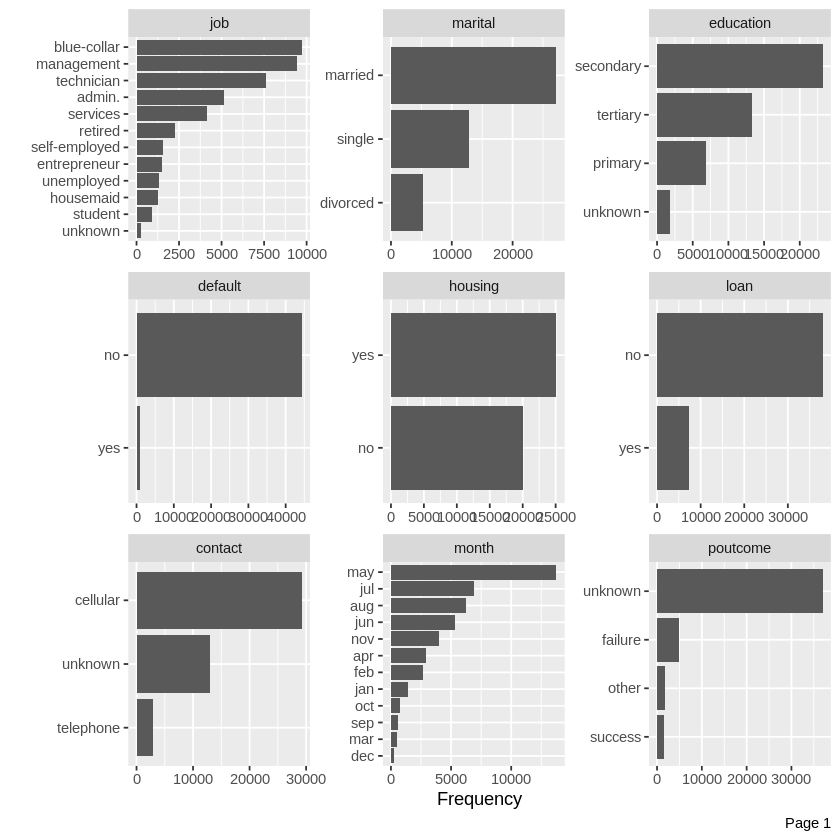

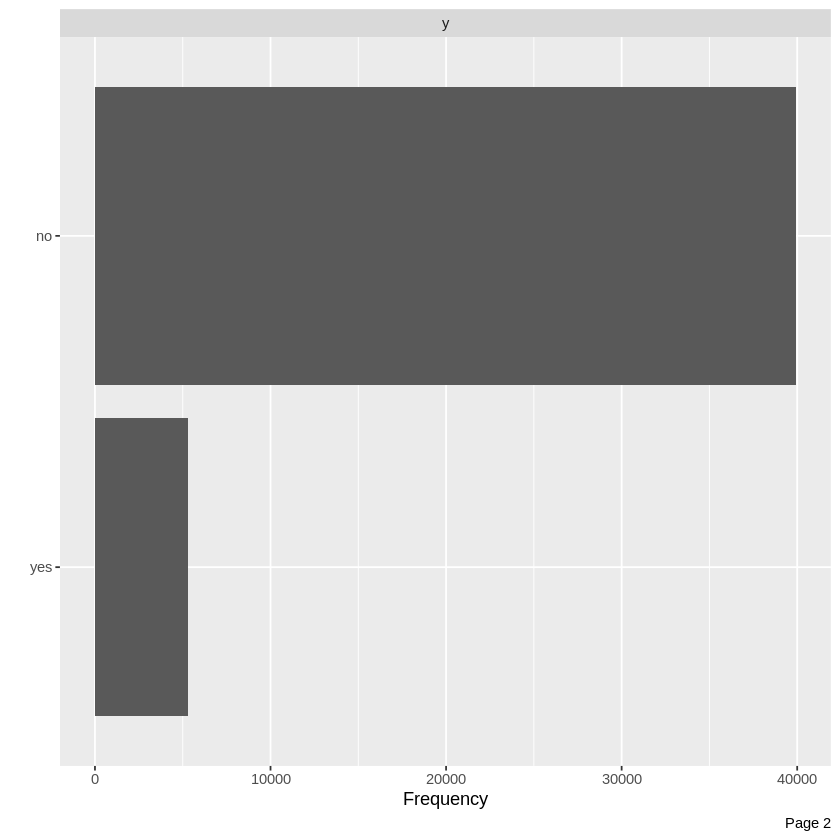

In [4]:
plot_bar(df)

A quick glance at the graphs reveals that the majority of the customers 
are married blue-collar workers.


# Creating Dummy Variables

Dummy for job

In [5]:
t=table(df$job)
final=round(prop.table(table(df$job,df$y),1)*100,1)
final
s=addmargins(final,2) 
sort(s[,1])
df=df %>% 
  mutate(job_1=as.numeric(job %in% c("self-employed","unknown","technician")), 
         job_2=as.numeric(job %in% c("services","housemaid","entrepreneur")),
         job_3=as.numeric(job %in% c("management","admin")),
         job_4=as.numeric(job=="student"),
         job_5=as.numeric(job=="retired"),
         job_6=as.numeric(job=="unemployed")) %>% 
  select(-job)

               
                  no  yes
  admin.        87.8 12.2
  blue-collar   92.7  7.3
  entrepreneur  91.7  8.3
  housemaid     91.2  8.8
  management    86.2 13.8
  retired       77.2 22.8
  self-employed 88.2 11.8
  services      91.1  8.9
  student       71.3 28.7
  technician    88.9 11.1
  unemployed    84.5 15.5
  unknown       88.2 11.8

student       retired    unemployed    management        admin. 
         71.3          77.2          84.5          86.2          87.8 
self-employed       unknown    technician      services     housemaid 
         88.2          88.2          88.9          91.1          91.2 
 entrepreneur   blue-collar 
         91.7          92.7

Dummy for Marital and Education

In [6]:
t=table(df$marital)
df=df%>%
  mutate(divorced=as.numeric(marital %in% c("divorced")),
         single=as.numeric(marital %in% c("single")),
         
  ) %>% 
  select(-marital)

  ##Making dummies for variable education
df=df %>% 
  mutate(edu_primary=as.numeric(education %in% c("primary")),
         edu_sec=as.numeric(education %in% c("secondary")),
         edu_tert=as.numeric(education %in% c("tertiary"))
  ) %>% 
  select(-education)

Dummies for Default, Housing, Loan and Contact

In [7]:
##Making dummies for varible default
df$default=as.numeric(df$default=="yes")
##Making dummies for variable housing
df$housing=as.numeric(df$housing=="yes")
##Making dummies for variable loan
df$loan=as.numeric(df$loan=="yes")
##dummy variable for contact
df=df %>% 
  mutate(co_cellular=as.numeric(contact %in% c("cellular")),
         co_tel=as.numeric(contact %in% c("telephone"))
  ) %>% 
  select(-contact)

Dummies for Month and poutcome

In [8]:
##Making dummies for variable month
finalmnth=round(prop.table(table(df$month,df$y),1)*100,1)
sss=addmargins(finalmnth,2) #adding margin across Y
sort(sss[,1])
df=df %>% 
  mutate(month_1=as.numeric(month %in% c("aug","jun","nov","jan","jul")), 
         month_2=as.numeric(month %in% c("dec","sep")),
         month_3=as.numeric(month=="mar"),
         month_4=as.numeric(month=="oct"),
         month_5=as.numeric(month=="apr"),
         month_6=as.numeric(month=="feb")) %>% 
  select(-month)
## dummies for variable outcome
df=df %>% 
  mutate(poc_success=as.numeric(poutcome %in% c("success")),
         poc_failure=as.numeric(poutcome %in% c("failure")),
         poc_other=as.numeric(poutcome %in% c("other"))
  )%>% 
  select(-poutcome)

mar  dec  sep  oct  apr  feb  aug  jun  nov  jan  jul  may 
48.0 53.3 53.5 56.2 80.3 83.4 89.0 89.8 89.8 89.9 90.9 93.3

In [53]:
df$y=as.numeric(df$y=="yes")
attach(df)
head(df)

The following objects are masked from df (pos = 3):

    age, balance, campaign, contact, day, default, duration, education,
    housing, job, loan, marital, month, pdays, poutcome, previous, y


The following objects are masked from df (pos = 4):

    age, balance, campaign, contact, day, default, duration, education,
    housing, job, loan, marital, month, pdays, poutcome, previous, y


The following objects are masked from df (pos = 5):

    age, balance, campaign, contact, day, default, duration, education,
    housing, job, loan, marital, month, pdays, poutcome, previous, y


The following objects are masked from df (pos = 6):

    age, balance, campaign, contact, day, default, duration, education,
    housing, job, loan, marital, month, pdays, poutcome, previous, y


The following objects are masked from df (pos = 7):

    age, balance, campaign, contact, day, default, duration, education,
    housing, job, loan, marital, month, pdays, poutcome, previous, y


The following object

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<dbl>
1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
6,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,0


Splitting the data into Train and Test data

In [10]:
#data split
set.seed(456)
split <- initial_split(df, prop = .8, strata = y)
df_train <- training(split)
df_test <- testing(split)

introduce(df_train)
introduce(df_test)

rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,complete_rows,total_observations,memory_usage
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
36168,33,0,33,0,0,36168,1193544,8542848


rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,complete_rows,total_observations,memory_usage
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
9043,33,0,33,0,0,9043,298419,2141376


# Building Model

In [54]:
mod_lm <- lm(y~.,data=df_train)
summary(mod_lm)


Call:
lm(formula = y ~ ., data = df_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.26123 -0.11001 -0.03986  0.02180  1.06125 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.833e-02  1.202e-02  -3.188  0.00143 ** 
age          3.555e-05  1.749e-04   0.203  0.83897    
default     -6.150e-03  1.074e-02  -0.572  0.56701    
balance      1.469e-06  4.828e-07   3.042  0.00236 ** 
housing     -5.338e-02  3.349e-03 -15.940  < 2e-16 ***
loan        -2.658e-02  3.936e-03  -6.752 1.48e-11 ***
day         -5.960e-05  1.825e-04  -0.327  0.74396    
duration     4.697e-04  5.570e-06  84.329  < 2e-16 ***
campaign    -9.847e-04  4.775e-04  -2.062  0.03919 *  
pdays       -4.654e-05  3.044e-05  -1.529  0.12629    
previous     1.844e-03  9.613e-04   1.918  0.05515 .  
job_1       -4.092e-03  4.223e-03  -0.969  0.33264    
job_2       -6.830e-03  4.457e-03  -1.532  0.12546    
job_3        2.319e-03  5.130e-03   0.452  0.65130    
job_4       

Removing the value p>5

In [55]:
t=vif(mod_lm)
sort(t,decreasing = T)[1:5]
mod_lm1<-lm(formula = y ~ . - edu_sec, data = df_train)
summary(mod_lm1)
t=vif(mod_lm1)
sort(t,decreasing = T)[1:5]
xf=df_train %>% 
  select(-edu_sec)
fit=glm(y~.,family = "binomial",data=xf) #32 predictor var
summary(fit)


edu_sec    edu_tert       pdays edu_primary poc_failure 
   6.827876    6.471061    4.599851    4.140905    4.117022


Call:
lm(formula = y ~ . - edu_sec, data = df_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.26134 -0.11001 -0.03984  0.02183  1.06111 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.070e-02  9.501e-03  -4.283 1.84e-05 ***
age          4.054e-05  1.742e-04   0.233  0.81602    
default     -6.130e-03  1.074e-02  -0.571  0.56826    
balance      1.469e-06  4.828e-07   3.043  0.00235 ** 
housing     -5.342e-02  3.347e-03 -15.962  < 2e-16 ***
loan        -2.664e-02  3.931e-03  -6.776 1.25e-11 ***
day         -5.917e-05  1.825e-04  -0.324  0.74575    
duration     4.697e-04  5.570e-06  84.333  < 2e-16 ***
campaign    -9.842e-04  4.775e-04  -2.061  0.03931 *  
pdays       -4.653e-05  3.044e-05  -1.529  0.12636    
previous     1.842e-03  9.613e-04   1.916  0.05541 .  
job_1       -4.082e-03  4.223e-03  -0.967  0.33377    
job_2       -6.837e-03  4.457e-03  -1.534  0.12503    
job_3        2.386e-03  5.126e-03   0.466  0.64152    
jo

pdays poc_failure   poc_other       job_3     month_1 
   4.599847    4.116948    2.255517    2.160763    1.907643


Call:
glm(formula = y ~ ., family = "binomial", data = xf)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.6906  -0.3821  -0.2566  -0.1609   3.2969  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.029e+00  1.415e-01 -28.476  < 2e-16 ***
age         -1.448e-03  2.427e-03  -0.597  0.55081    
default     -1.351e-01  1.876e-01  -0.720  0.47147    
balance      1.402e-05  5.807e-06   2.415  0.01574 *  
housing     -7.748e-01  4.803e-02 -16.130  < 2e-16 ***
loan        -4.867e-01  6.590e-02  -7.385 1.52e-13 ***
day         -2.503e-03  2.573e-03  -0.973  0.33065    
duration     4.114e-03  7.091e-05  58.019  < 2e-16 ***
campaign    -8.615e-02  1.106e-02  -7.786 6.89e-15 ***
pdays       -5.696e-05  3.416e-04  -0.167  0.86756    
previous     2.500e-02  1.079e-02   2.317  0.02053 *  
job_1       -6.463e-02  6.162e-02  -1.049  0.29421    
job_2       -1.394e-01  6.956e-02  -2.004  0.04511 *  
job_3        1.786e-03  7.095e-02   0.025

Tuning the Model

In [56]:
logreg <- glm(y ~ ., data=df_train, family="binomial")
summary(logreg)


Call:
glm(formula = y ~ ., family = "binomial", data = df_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.6903  -0.3821  -0.2566  -0.1610   3.2968  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.999e+00  1.730e-01 -23.121  < 2e-16 ***
age         -1.514e-03  2.437e-03  -0.621  0.53449    
default     -1.355e-01  1.877e-01  -0.722  0.47039    
balance      1.402e-05  5.808e-06   2.414  0.01580 *  
housing     -7.743e-01  4.806e-02 -16.113  < 2e-16 ***
loan        -4.858e-01  6.595e-02  -7.367 1.75e-13 ***
day         -2.513e-03  2.573e-03  -0.977  0.32866    
duration     4.114e-03  7.091e-05  58.015  < 2e-16 ***
campaign    -8.613e-02  1.106e-02  -7.785 6.99e-15 ***
pdays       -5.714e-05  3.416e-04  -0.167  0.86714    
previous     2.502e-02  1.079e-02   2.319  0.02041 *  
job_1       -6.495e-02  6.163e-02  -1.054  0.29193    
job_2       -1.393e-01  6.956e-02  -2.003  0.04517 *  
job_3        4.382e-04  7.108e-02  

Removing the unsignificant variables

In [57]:
# removing unsignificant variables

logreg1 = glm(y ~ balance + housing + loan + duration + campaign  +previous+ 
                      job_2 + job_5+job_4 + divorced + single + edu_primary +edu_tert+ 
                      co_cellular + co_tel +  month_2 + month_3 + month_4 + 
                      month_5 + month_6 + poc_success + poc_failure + poc_other,data=df_train,family="binomial")
summary(logreg1)


Call:
glm(formula = y ~ balance + housing + loan + duration + campaign + 
    previous + job_2 + job_5 + job_4 + divorced + single + edu_primary + 
    edu_tert + co_cellular + co_tel + month_2 + month_3 + month_4 + 
    month_5 + month_6 + poc_success + poc_failure + poc_other, 
    family = "binomial", data = df_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.7089  -0.3830  -0.2569  -0.1608   3.3266  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.227e+00  8.242e-02 -51.286  < 2e-16 ***
balance      1.369e-05  5.783e-06   2.367  0.01792 *  
housing     -7.300e-01  4.432e-02 -16.472  < 2e-16 ***
loan        -4.927e-01  6.548e-02  -7.525 5.27e-14 ***
duration     4.115e-03  7.087e-05  58.069  < 2e-16 ***
campaign    -8.869e-02  1.098e-02  -8.077 6.61e-16 ***
previous     2.491e-02  1.075e-02   2.316  0.02053 *  
job_2       -1.199e-01  6.267e-02  -1.913  0.05574 .  
job_5        4.469e-01  8.039e-02   5.559 2.71e-08 *

# Predicting the output

In [58]:
prob<-predict(logreg1,newdata = df_test,type="response")

summary(prob)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0002463 0.0204428 0.0442783 0.1165611 0.1071450 0.9999898 

# Creating Confusion Matrix

In [59]:
confusion<-table(prob>0.5,df_test$y)
confusion

       
           0    1
  FALSE 7796  698
  TRUE   189  360

# Finding Accuracy

In [16]:
Accuracy<-sum(diag(confusion)/sum(confusion))
Accuracy 

[1] 0.9019131

**As, we can observe the Accuracy of the classification model is 90.1%**

# RandomForest

Loading The Data

In [60]:
df2<-read.csv("bank-full.csv",sep = ";",header = T)

Creating Dummy variables

In [ ]:
t=table(df2$job)
final=round(prop.table(table(df2$job,df2$y),1)*100,1)
final
s=addmargins(final,2) 
sort(s[,1])
df2=df2 %>% 
  mutate(job_1=as.numeric(job %in% c("self-employed","unknown","technician")), 
         job_2=as.numeric(job %in% c("services","housemaid","entrepreneur")),
         job_3=as.numeric(job %in% c("management","admin")),
         job_4=as.numeric(job=="student"),
         job_5=as.numeric(job=="retired"),
         job_6=as.numeric(job=="unemployed")) %>% 
  select(-job)
## dummy variable for material
t=table(df2$marital)
df2=df2%>%
  mutate(divorced=as.numeric(marital %in% c("divorced")),
         single=as.numeric(marital %in% c("single")),
         
  ) %>% 
  select(-marital)

##Making dummies for variable education
df2=df2 %>% 
  mutate(edu_primary=as.numeric(education %in% c("primary")),
         edu_sec=as.numeric(education %in% c("secondary")),
         edu_tert=as.numeric(education %in% c("tertiary"))
  ) %>% 
  select(-education)
##Making dummies for varible default
df2$default=as.numeric(df2$default=="yes")
##Making dummies for variable housing
df2$housing=as.numeric(df2$housing=="yes")
##Making dummies for variable loan
df2$loan=as.numeric(df2$loan=="yes")
##dummy variable for contact
df2=df2 %>% 
  mutate(co_cellular=as.numeric(contact %in% c("cellular")),
         co_tel=as.numeric(contact %in% c("telephone"))
  ) %>% 
  select(-contact)
##Making dummies for variable month
finalmnth=round(prop.table(table(df2$month,df2$y),1)*100,1)
sss=addmargins(finalmnth,2) #adding margin across Y
sort(sss[,1])
df2=df2 %>% 
  mutate(month_1=as.numeric(month %in% c("aug","jun","nov","jan","jul")), 
         month_2=as.numeric(month %in% c("dec","sep")),
         month_3=as.numeric(month=="mar"),
         month_4=as.numeric(month=="oct"),
         month_5=as.numeric(month=="apr"),
         month_6=as.numeric(month=="feb")) %>% 
  select(-month)
## dummies for variable outcome
df2=df2 %>% 
  mutate(poc_success=as.numeric(poutcome %in% c("success")),
         poc_failure=as.numeric(poutcome %in% c("failure")),
         poc_other=as.numeric(poutcome %in% c("other"))
  )%>% 
  select(-poutcome)

df2$y=as.factor(df2$y)
attach(df2)

Splitting the data into Train and Test data

In [63]:
set.seed(456)
split <- initial_split(df2, prop = .8, strata = y)
df2_train <- training(split)
df2_test <- testing(split)

# Building Random Forest Model

where ntree=500,mtry is not given

In [64]:
set.seed(501)
model <- randomForest(y~ ., data = df2_train, ntree = 500)

model


Call:
 randomForest(formula = y ~ ., data = df2_train, ntree = 500) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 5

        OOB estimate of  error rate: 9.48%
Confusion matrix:
       no  yes class.error
no  31169  768  0.02404734
yes  2659 1572  0.62845663

We can observe the error rate : 9.48%

# Evaluating Model Performance



By adjusting the tress and mtry performance of the random forest can be improved

Genetaing the plot

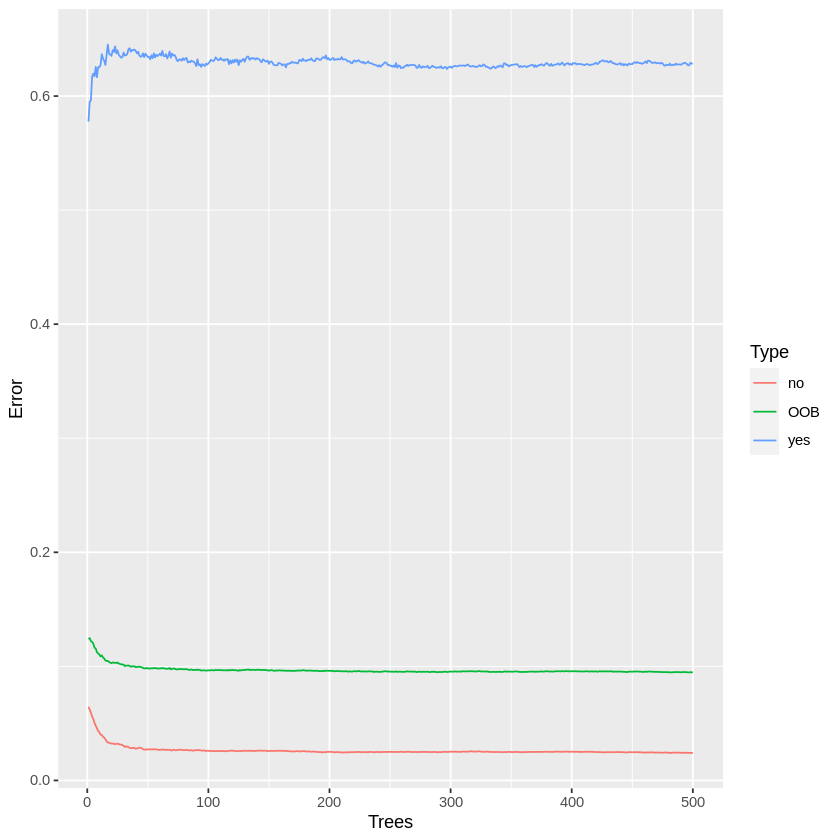

In [65]:
oob.error.data <- data.frame(
  Trees=rep(1:nrow(model$err.rate), times=3),
  Type=rep(c("OOB", "no", "yes"), each=nrow(model$err.rate)),
  Error=c(model$err.rate[,"OOB"], 
          model$err.rate[,"no"], 
          model$err.rate[,"yes"]))

ggplot(data=oob.error.data, aes(x=Trees, y=Error)) +
  geom_line(aes(color=Type))

Adjusting the ntree to 1000

In [66]:
set.seed(502)
model <- randomForest(y~ ., data = df2_train, ntree = 1000)

model


Call:
 randomForest(formula = y ~ ., data = df2_train, ntree = 1000) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 5

        OOB estimate of  error rate: 9.48%
Confusion matrix:
       no  yes class.error
no  31178  759  0.02376554
yes  2668 1563  0.63058379

In [ ]:
oob.error.data <- data.frame(
  Trees=rep(1:nrow(model$err.rate), times=3),
  Type=rep(c("OOB", "no", "yes"), each=nrow(model$err.rate)),
  Error=c(model$err.rate[,"OOB"], 
          model$err.rate[,"no"], 
          model$err.rate[,"yes"]))

ggplot(data=oob.error.data, aes(x=Trees, y=Error)) +
  geom_line(aes(color=Type))

By Observing the above plot it is clear that error rate stabilizes mostly after 100 trees so adding more trees didn't help

# adjusting the mtry

mtry=3

In [28]:
set.seed(504)
model <- randomForest(y~ ., data = df2_train, ntree = 1000,mtry = 3)

model


Call:
 randomForest(formula = y ~ ., data = df2_train, ntree = 1000,      mtry = 3) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 3

        OOB estimate of  error rate: 10.14%
Confusion matrix:
       no yes class.error
no  31614 323  0.01011366
yes  3345 886  0.79059324

mtry=7

In [29]:
set.seed(505)
model <- randomForest(y~ ., data = df2_train, ntree = 1000,mtry = 7)

model


Call:
 randomForest(formula = y ~ ., data = df2_train, ntree = 1000,      mtry = 7) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 7

        OOB estimate of  error rate: 9.41%
Confusion matrix:
       no  yes class.error
no  30964  973  0.03046623
yes  2431 1800  0.57456866

mtry=10

In [26]:
set.seed(503)
model <- randomForest(y~ ., data = df2_train, ntree = 1000,mtry = 10)

model


Call:
 randomForest(formula = y ~ ., data = df2_train, ntree = 1000,      mtry = 10) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 10

        OOB estimate of  error rate: 9.4%
Confusion matrix:
       no  yes class.error
no  30866 1071  0.03353477
yes  2328 1903  0.55022453

I got the best performance when trees = 1000 and mtry =10

# Predicting the Output

In [30]:
rf_pred <- predict(model,df2_test)

summary(rf_pred)

no  yes 
8326  717

# Creating Confusion Matrix

In [34]:
rf_confusion <- table(rf_pred,df2_test$y)

rf_confusion

       
rf_pred   no  yes
    no  7747  579
    yes  238  479

# Finding Accuracy

In [35]:
Accuracy<-sum(diag(rf_confusion)/sum(rf_confusion))
Accuracy

[1] 0.9096539

In [38]:
install.packages("caTools")

library(caTools)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




In [40]:
importance(model)
  

,MeanDecreaseGini
age,701.46375
default,12.83527
balance,733.72857
housing,175.88992
loan,68.98281
day,654.03115
duration,2043.34260
campaign,274.98356
pdays,346.15935
previous,174.88569


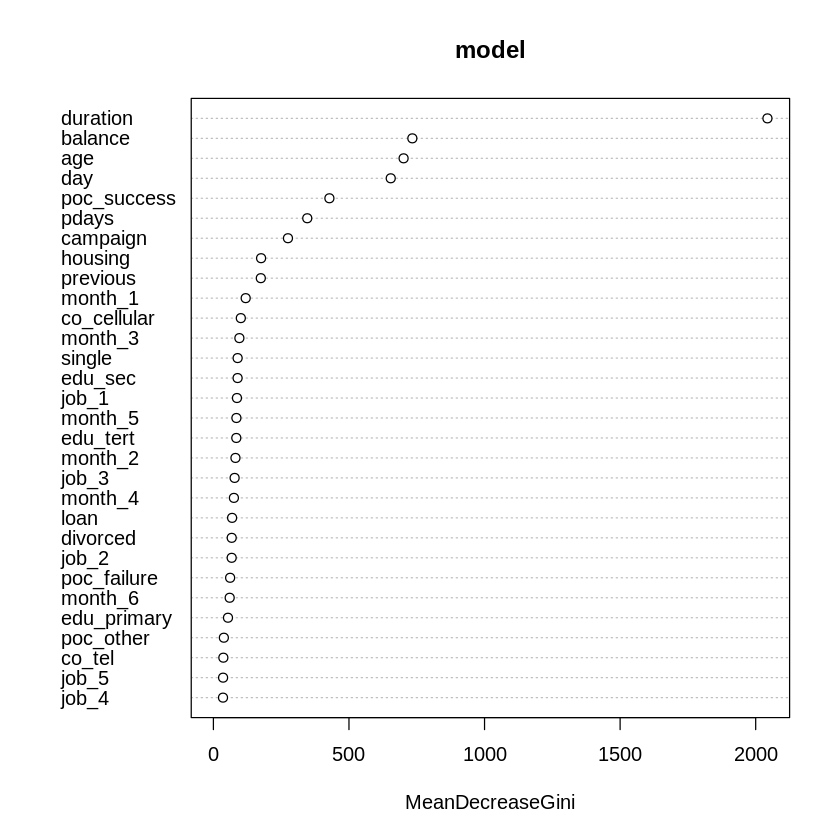

In [41]:
# Variable importance plot
varImpPlot(model)

The plot clearly shows duration is the most important feature

# Conclusion

Finally, the bank's target number of customers for term deposits is 
successfully predicted using a logistic regression model with an accuracy of 
90.1 percent and by using random forest with an accuracy of 90.9 percent